In [1]:
import load_data as ld
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import sklearn.feature_extraction.text
import sklearn.multiclass
import sklearn.linear_model
% matplotlib inline
plt.rcParams['figure.figsize'] = 12, 8

In [2]:
df = ld.load_data()

C:\Users\kevin.rose\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Article Tags Exploration

In [3]:
print('Number relevant articles:', df['relevant'].sum())
print('Number tagged articles  :', df.loc[:, 'OEMC':'TASR'].any(1).sum())

Number relevant articles: 112091
Number tagged articles  : 36986


In [4]:
categories_df = ld.load_categories()
categories_df = categories_df.loc[:, ['abbreviation', 'category_name']]
categories_df.set_index('abbreviation', drop=True, inplace=True)

categories_df['counts'] = df.loc[:, 'OEMC':'TASR'].apply(sum, reduce=True)
categories_df.sort_values(by='counts')

,category_name,counts
abbreviation,,
ENVI,Environmental Crimes,49
TASR,Police Use of Taser,119
OEMC,Office of Emergency Management & Communications,127
REEN,Re-Entry,129
CPBD,Chicago Police Board,155
ILSC,Illinois State Court,179
IMMG,Immigration,218
CPUB,Cook County Public Defender's Office,222
IDOC,Illinois Department of Corrections,300


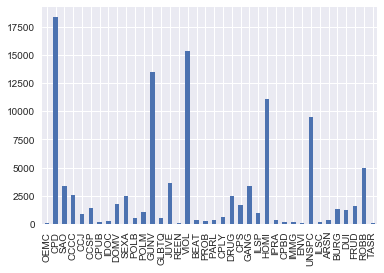

In [5]:
df.loc[:, 'OEMC':'TASR'].apply(sum, reduce=True).plot(kind='bar');

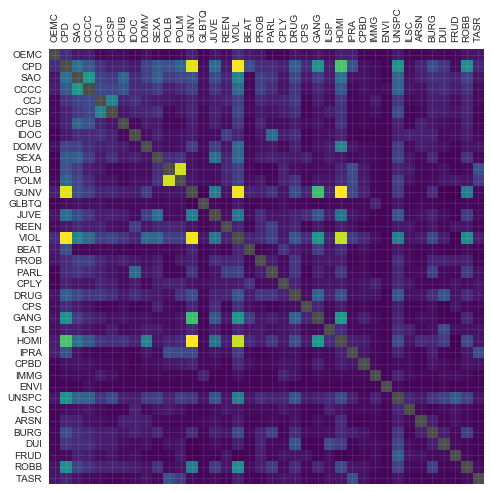

In [6]:
corrs = df.loc[:, 'OEMC':'TASR'].corr()
for i in range(corrs.shape[0]):
    corrs.iloc[i, i] = np.nan

cmap = matplotlib.cm.viridis
cmap.set_bad((.3, .3, .3),1.)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(np.ma.masked_invalid(corrs.values), cmap=cmap)

ax.grid(True, color=(.9, .9, .9), alpha=.1)

plt.xticks(range(len(corrs.columns)), corrs.columns, rotation=90);
plt.yticks(range(len(corrs.columns)), corrs.columns);

# Text Contents Exploration

In [7]:
# Print a random article just to see what they look like.
i = np.random.choice(df.shape[0])
print('ARTICLE ID:', df.index[i], '\n------------------')
print(df.iloc[i]['bodytext'])

ARTICLE ID: 120772 
------------------
##  The 30-Day sex challenge: Days 5 & 6

![][1]

[ Tweet ][2]

By  Tara Scalzo  , Monday at 7:42 pm

Ya know that saying ‘life is what happens to you while you’re busy making
other plans’? Well, apparently the same holds true when you’re trying to have
sex.

** Day 5 ** proved to be fruitless. After Hubby came home from his usual 13-hour
 day, dinner was eaten, dishes were done, kids were bathed and shit was picked u
p. Hubby went to put Dude down to bed at his normal bedtime, never to be seen ag
ain. After an hour, I found him snoring on Dude’s floor, completely passed out. 
I was neither shocked nor mad.  I didn’t have the heart to wake him, so I let hi
m sleep. After another hour went by, I woke him and told him to go to our bed, o
therwise tomorrow his back would be killing him and I’d never hear the end of it
. 

A few hours later, I was finally ready to go to bed and already knew that if
anything were to happen, I’d have to take the initiat

## Some questions:

* How to handle articles that talk about more than one crime (i.e. a summary of weekend violence)?
* Would we want the scraper to keep any more information going forward? Author name, for example?
* Do we want to have manually-defined cleaning built around the format? I.e. specifically remove the links at the bottom that are result of RSS format? 

In [8]:
import nltk
# you may need to run nltk.download()
# and get the "punkt" dataset under the "Models" tab
# to use the word_tokenize function. Other models might
# be necessary as well.

In [9]:
def all_words():
    counter = 0
    for txt in df['bodytext']:
        tokens = nltk.tokenize.word_tokenize(txt)
        for t in tokens:
            if t[0] not in '[](){},.\'"`*:;/\\-+=_':
                yield t.lower()
                counter += 1
            if counter > 5e6: # at some point will need to run fully, but truncate for now
                return

In [10]:
word_freqs = nltk.FreqDist(all_words())

"the": 231437
"to": 116701
"a": 112429
"and": 108191
"of": 97070
"in": 87230
"that": 44196
"for": 41221
"was": 40798
"said": 39098
"on": 35101
"he": 33583
"is": 30756
"with": 28984
"http": 27320
"at": 27077
"it": 25655
"his": 23825
"1": 23028
"2": 22471
"as": 20701
"by": 20654
"i": 20545
"3": 19684
"be": 18580
"from": 18571
"#": 18509
"4": 18202
"this": 18195
"not": 17076
"5": 16959
"have": 16805
"but": 16358
"an": 15952
"chicago": 15871
"police": 15635
"6": 15384
"they": 15253
"who": 15136
"are": 15050


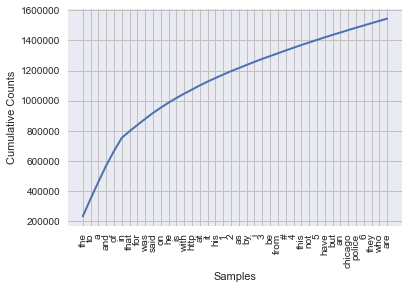

In [11]:
for pair in word_freqs.most_common(40):
    print('"{}": {}'.format(pair[0], pair[1]))
word_freqs.plot(40, cumulative=True)

In [12]:
print('The word "the" is {0:.4} times more common than "gun".'.format(
    word_freqs.freq('the') / word_freqs.freq('gun')
))

The word "the" is 173.5 times more common than "gun".


In [13]:
print('Confusion matrix using existence of "gun" to predict "GUNV" tag:')
pd.crosstab(df['bodytext'].str.contains('gun'), df['GUNV'])

Confusion matrix using existence of "gun" to predict "GUNV" tag:


GUNV,0,1
bodytext,,
False,238193,4347
True,20121,9147
